In [93]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import sklearn
import math
import joblib
from matplotlib import pyplot as plt

In [49]:
# Load the npz file

train_1 = np.load("data/train_data.npy")
train_2 = np.load("data/train_labels.npy")
train_df = DataFrame(train_1)
del train_1
train_lb_df = DataFrame(train_2)
del train_2
"""
# For validation
val_1 = np.load("data/eval_data.npy")
val_2 = np.load("data/eval_labels.npy")
val_df = DataFrame(val_1)
del val_1
val_lb_df = DataFrame(val_2)
del val_2
"""
# for unit_test

uni_df = train_df.iloc[:500000,:]
uni_lb_df = train_lb_df.iloc[:500000,:]

### Handmade Onevone Classifier for 3 classes

In [94]:
def Predict(X, weights=[1.,1.,1.]):
    from sklearn.metrics import classification_report
    len_X = len(X)
    
    model_12 = joblib.load("Model/12_final_LDA_training")
    model_01 = joblib.load("Model/01_final_Ensemble_training_afterCut_0_1_")
    model_02 = joblib.load("Model/02_final_Ensemble_training_afterCut_0_2_")
    """
    print(model_12.classes_)
    print(model_01.classes_)
    print(model_02.classes_)
    """
    nondrop_list_01 = [x for x in range(70) if x not in [55,57,59,60]]
    nondrop_list_02 = [x for x in range(70) if x not in range(55,61)]
    
    prediction_12 = model_12.predict_proba(X) * weights[0]
    prediction_01 = model_01.predict_proba(X[nondrop_list_01])* weights[1]
    prediction_02 = model_02.predict_proba(X[nondrop_list_02])* weights[2]
    
    """
    prob_df = pd.DataFrame()
    prob_df["prob_0"] = prediction_01[:,0] + prediction_02[:,0]
    prob_df["prob_1"] = prediction_12[:,0] + prediction_01[:,1]
    prob_df["prob_2"] = prediction_12[:,1] + prediction_02[:,1]
    """
    
    # To adjust the weight of the classifier to be at a good ratio of output
    
    prediction_df = pd.DataFrame()
    prediction_df["prediction"] = pd.Series( np.zeros(shape=(len_X,)) )
    for i in range(len_X):
        prob_list = [ prediction_01[i,0] + prediction_02[i,0],
                     prediction_12[i,0] + prediction_01[i,1],
                     prediction_12[i,1] + prediction_02[i,1] ]
        prediction_df.loc[i,"prediction"] = prob_list.index(max(prob_list))
    
    prediction_df["prediction"] = prediction_df["prediction"].astype("int")
    
    prediction_df.info()
    
    return prediction_df

In [52]:
#Predict(uni_df, uni_lb_df).value_counts()
#print( Predict(uni_df.iloc[:3000,:], uni_lb_df.iloc[:3000,:]).value_counts() )
#print( Predict(uni_df.iloc[:3000,:], uni_lb_df.iloc[:3000,:], [1.,2.,2.]).value_counts() )
#print( Predict(uni_df.iloc[:3000,:], uni_lb_df.iloc[:3000,:], [1.2,1.,1.]).value_counts() )
#print( Predict(uni_df.iloc[:3000,:], uni_lb_df.iloc[:3000,:], [1.3,1.,1.]).value_counts() )
#print( Predict(uni_df.iloc[:3000,:], uni_lb_df.iloc[:3000,:], [1.25,1.,1.]).value_counts() )
#print( Predict(uni_df.iloc[:3000,:], uni_lb_df.iloc[:3000,:], [1000./686.,1000./2628.,1000./2686.]).value_counts() )

print( Predict(uni_df.iloc[:,:], uni_lb_df.iloc[:,:]).value_counts() )

[1 2]
[0 1]
[0 2]
    prediction
0            0
1            0
2            0
3            0
4            0
5            2
6            0
7            0
8            0
9            0
10           0
11           0
12           2
13           0
14           0
15           0
16           2
17           0
18           0
19           1
prediction
0             2314
2              372
1              314
dtype: int64
[1 2]
[0 1]
[0 2]
    prediction
0            0
1            0
2            0
3            0
4            0
5            2
6            0
7            0
8            0
9            0
10           0
11           0
12           2
13           0
14           0
15           0
16           2
17           0
18           0
19           1
prediction
0             357357
1              73171
2              69472
dtype: int64


In [74]:
for i in [2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000]:
    #three = pd.DataFrame(Predict(uni_df.iloc[:i,:], uni_lb_df.iloc[:i,:], [1.25,1.,1.]).value_counts())
    #three["label"] = three.index
    three = Predict(uni_df.iloc[:i,:], [1.,1.,1.]).value_counts()
    print(three)
    print( three[three.index==0]/i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  2000 non-null   int32
dtypes: int32(1)
memory usage: 7.9 KB
prediction
0             1554
2              239
1              207
dtype: int64
prediction
0             0.777
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  5000 non-null   int32
dtypes: int32(1)
memory usage: 19.7 KB
prediction
0             3934
2              566
1              500
dtype: int64
prediction
0             0.7868
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  10000 non-null  int3

In [73]:
for i in [2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000]:
    #three = pd.DataFrame(Predict(uni_df.iloc[:i,:], uni_lb_df.iloc[:i,:], [1.25,1.,1.]).value_counts())
    #three["label"] = three.index
    three = Predict(uni_df.iloc[:i,:], [1.25,1.,1.]).value_counts()
    print(three)
    print( three[three.index==0]/i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  2000 non-null   int32
dtypes: int32(1)
memory usage: 7.9 KB
prediction
0             805
1             746
2             449
dtype: int64
prediction
0             0.4025
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  5000 non-null   int32
dtypes: int32(1)
memory usage: 19.7 KB
prediction
0             2084
1             1864
2             1052
dtype: int64
prediction
0             0.4168
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  10000 non-null  int32


In [55]:
print( Predict(uni_df.iloc[:,:], [1.25,1.,1.]).value_counts() )

[1 2]
[0 1]
[0 2]
prediction
0             190571
1             184128
2             125301
dtype: int64


In [59]:
print( Predict(uni_df.iloc[:,:], [1.24,1.,1.]).value_counts() )

[1 2]
[0 1]
[0 2]
prediction
0             197703
1             180243
2             122054
dtype: int64


In [62]:
print( Predict(uni_df.iloc[:,:], [1.27,1.,1.]).value_counts() )

[1 2]
[0 1]
[0 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
1             191727
0             175949
2             132324
dtype: int64


In [70]:
print( Predict(uni_df.iloc[:,:], [1.23,1.,1.]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             204863
1             176323
2             118814
dtype: int64


In [75]:
print( Predict(uni_df.iloc[:,:], [1.21,1.,1.]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             219212
1             167969
2             112819
dtype: int64


In [77]:
print( Predict(uni_df.iloc[:,:], uni_lb_df.iloc[:,:], [1.25,1.,1.1]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             241161
1             141589
2             117250
dtype: int64


In [78]:
print( Predict(uni_df.iloc[:,:], [1.25,0.9,1.1]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             200750
1             150314
2             148936
dtype: int64


In [79]:
print( Predict(uni_df.iloc[:,:], [1.27,0.9,1.1]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             183016
1             160467
2             156517
dtype: int64


In [80]:
print( Predict(uni_df.iloc[:,:], [1.275,0.9,1.1]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             178701
1             162850
2             158449
dtype: int64


In [81]:
print( Predict(uni_df.iloc[:,:], [1.28,0.9,1.1]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             174180
1             165424
2             160396
dtype: int64


In [82]:
print( Predict(uni_df.iloc[:,:], [1.28,0.89,1.11]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             175670
2             162754
1             161576
dtype: int64


In [83]:
print( Predict(uni_df.iloc[:,:], [1.285,0.89,1.11]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             171270
2             164668
1             164062
dtype: int64


In [84]:
print( Predict(uni_df.iloc[:,:], [1.29,0.89,1.11]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
0             166779
2             166612
1             166609
dtype: int64


In [91]:
print( Predict(train_df.iloc[:,:], [1.29,0.89,1.11]).value_counts() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174461 entries, 0 to 1174460
Data columns (total 1 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   prediction  1174461 non-null  int32
dtypes: int32(1)
memory usage: 4.5 MB
prediction
2             394041
0             391357
1             389063
dtype: int64


In [76]:
"""
for i in range(100):
    addition = (i+1)*0.002
    three = Predict(uni_df.iloc[:,:], [1.25+addition,0.89,1.11]).value_counts()
    print(three)
"""

'\nfor i in range(10):\n    minus = (i+2)*0.002\n    three = Predict(uni_df.iloc[:,:], uni_lb_df.iloc[:,:], [1.25-minus,1.,1.]).value_counts()\n    print(three)\n'

In [95]:
# For validation
val_1 = np.load("data/eval_data.npy")
val_2 = np.load("data/eval_labels.npy")
val_df = DataFrame(val_1)
del val_1
val_lb_df = DataFrame(val_2)
del val_2

In [88]:
print( Predict(val_df.iloc[:,:], [1.29,0.89,1.11]).value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175302 entries, 0 to 1175301
Data columns (total 1 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   prediction  1175302 non-null  int32
dtypes: int32(1)
memory usage: 4.5 MB
prediction
2             438979
1             400740
0             335583
dtype: int64


In [90]:
print( Predict(val_df.iloc[:500000,:],[1.29,0.89,1.11]).value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   prediction  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB
prediction
2             184813
1             168812
0             146375
dtype: int64


### Performance

In [101]:
def Performance(_y_pred, _y_true):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import precision_recall_fscore_support
    
    def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
       
        import itertools
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
    
    CM = confusion_matrix(_y_true, _y_pred, labels=[0, 1, 2])
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(CM, classes=[0, 1, 2], title='Confusion matrix (w/o normalization)')
    print(classification_report(_y_true, _y_pred, labels=[0, 1, 2]))

In [97]:
prediction = Predict(val_df.iloc[:,:], [1.29,0.89,1.11])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175302 entries, 0 to 1175301
Data columns (total 1 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   prediction  1175302 non-null  int32
dtypes: int32(1)
memory usage: 4.5 MB


NameError: name 'Performace' is not defined

Confusion matrix, without normalization
[[214389 204292 216712]
 [ 52580 196327    132]
 [ 68614    121 222135]]
              precision    recall  f1-score   support

           0       0.64      0.34      0.44    635393
           1       0.49      0.79      0.60    249039
           2       0.51      0.76      0.61    290870

    accuracy                           0.54   1175302
   macro avg       0.54      0.63      0.55   1175302
weighted avg       0.57      0.54      0.52   1175302



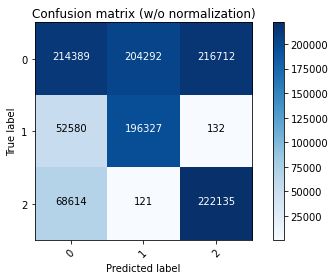

In [102]:
Performance(prediction, val_lb_df.iloc[:,0])